In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
data = pd.read_csv('../data/train.csv')
data.keys()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## EDA

### Correlation Matrix
This correlation matrix shows the relationships between six numerical features in what appears to be a customer or hotel dataset. Here's what stands out:

#### Strong Negative Correlations:
CryoSleep_num has notable negative correlations with RoomService (-0.25), FoodCourt (-0.21), and ShoppingMall (-0.21), suggesting that passengers in cryosleep don't use these amenities
This pattern makes logical sense if CryoSleep represents passengers who are suspended during travel

#### Weak Overall Correlations:
Most other relationships are quite weak (close to 0), indicating the features are largely independent of each other
Age shows very weak correlations with all other variables
The amenity usage variables (RoomService, FoodCourt, ShoppingMall) don't correlate strongly with each other, suggesting diverse spending patterns

#### Perfect Self-Correlations:
All diagonal values are 1.00, which is expected as each variable perfectly correlates with itself

#### VIP Status:

VIP_num shows weak correlations across the board, suggesting VIP status isn't strongly tied to age or specific amenity usage patterns

The data suggests this might be from a space travel context (given the CryoSleep variable), where passengers either use amenities normally or are in suspended animation, with spending behaviors being relatively independent across different service categories.

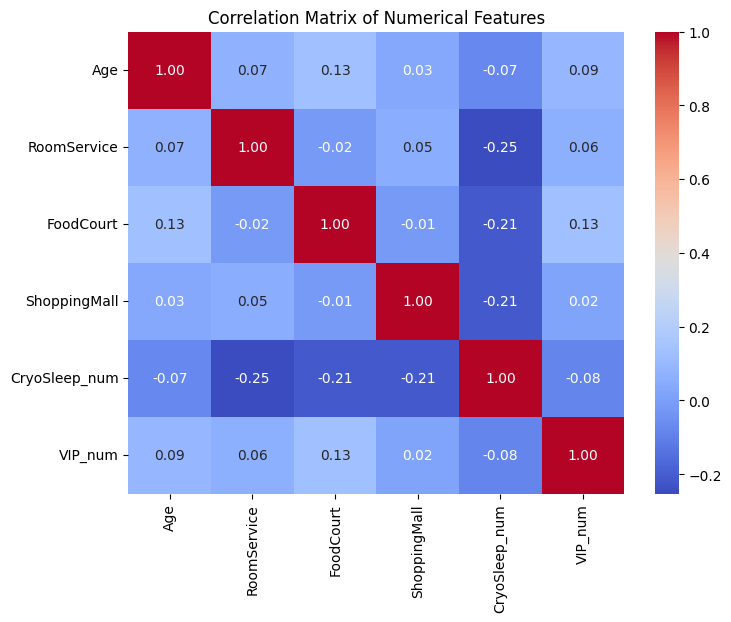

In [10]:
# Convert booleans to integers
data['CryoSleep_num'] = data['CryoSleep'].map({True:1, False:0})
data['VIP_num'] = data['VIP'].map({True:1, False:0})

# Select numerical columns
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'CryoSleep_num', 'VIP_num']

# Compute correlation matrix
corr_matrix = data[num_cols].corr()

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

HomePlanet vs Transported:

Earth passengers show the most balanced transportation outcome (roughly 57% not transported, 43% transported)
Europa passengers are more likely to be transported (about 65% transported vs 35% not transported)
Mars passengers show nearly even split but lean slightly toward being transported

CryoSleep vs Transported:

There's a strong relationship here: passengers not in CryoSleep are predominantly not transported (~67% vs 33%)
Passengers IN CryoSleep are predominantly transported (~82% vs 18%)
This suggests CryoSleep might be part of the transportation process or a strong predictor of successful transport

Destination vs Transported:

TRAPPIST-1e is the most common destination with fairly balanced transport rates
PSO J318.5-22 shows the most balanced outcome (nearly 50/50 split)
55 Cancri e passengers are more likely to be transported than not

VIP vs Transported:

VIP status shows minimal impact on transportation outcomes - both VIP and non-VIP passengers have very similar transport success rates
This aligns with the weak correlations seen in the correlation matrix

The most striking pattern is the CryoSleep relationship, which strongly suggests that entering cryogenic sleep is either a prerequisite for or highly predictive of successful transportation in this space travel scenario.

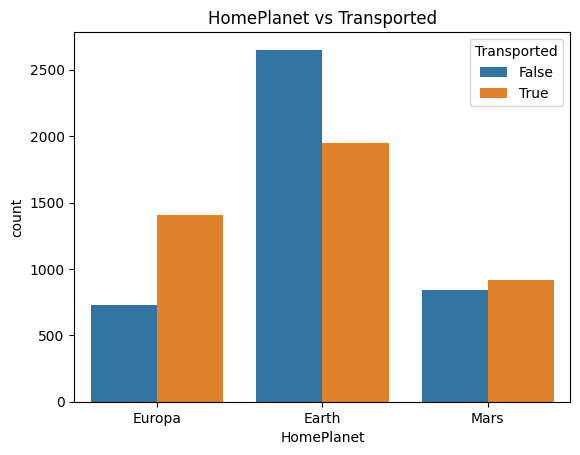

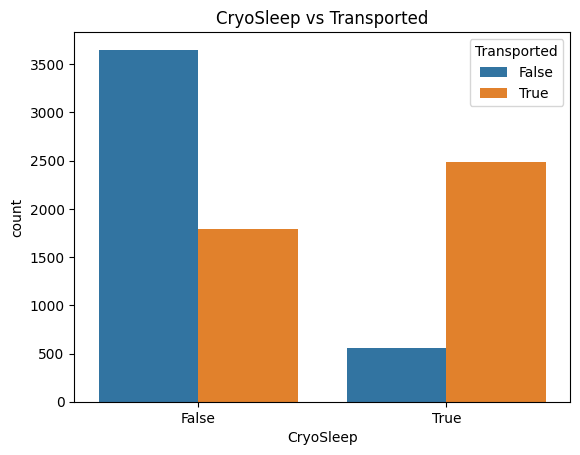

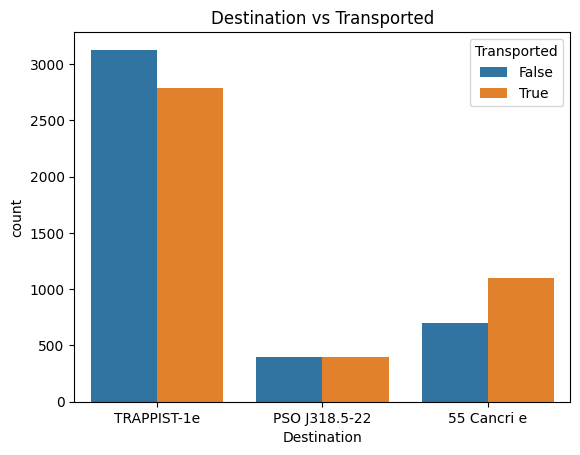

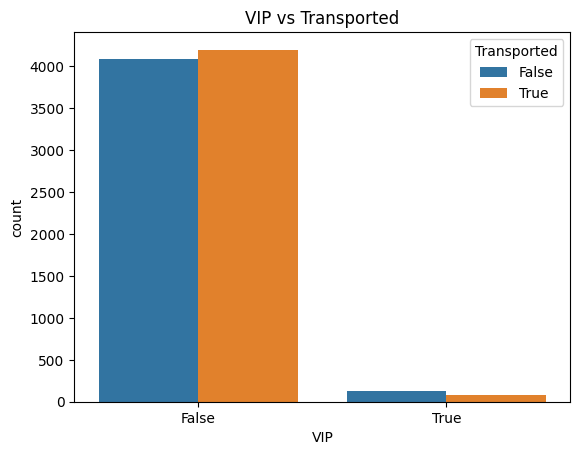

In [13]:
import matplotlib.pyplot as plt

categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for feature in categorical_features:
    sns.countplot(x=feature, hue='Transported', data=data)
    plt.title(f"{feature} vs Transported")
    plt.show()

In [15]:
for feature in categorical_features:
    print(data.groupby(feature)['Transported'].mean())

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64
CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: float64
Destination
55 Cancri e      0.610000
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: float64
VIP
False    0.506332
True     0.381910
Name: Transported, dtype: float64


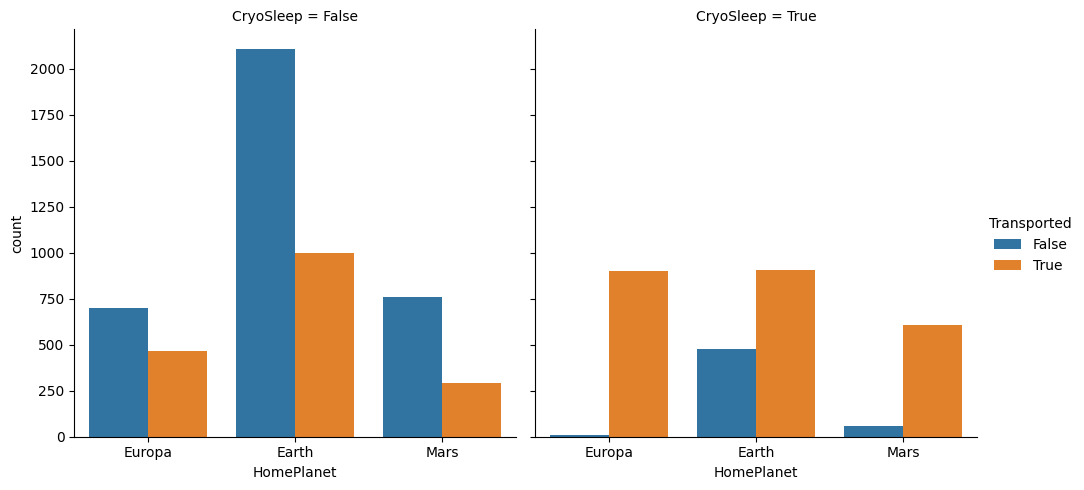

In [17]:
sns.catplot(
    x='HomePlanet',
    hue='Transported',
    col='CryoSleep',
    kind='count',
    data=data
)
plt.show()

## Home Planet

EDA Ideas:
- Count plot (value_counts()) to see distribution of planets.
- Check survival/target rate by planet (groupby + mean) — could reveal predictive power.
- Analyze missing values: does missingness correlate with survival or other features?

### Planet Distribution

In [20]:
data.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

### Survival By Planet

In [26]:
survival_by_planet = data.groupby('HomePlanet')['Transported'].mean().round(3)
survival_by_planet

HomePlanet
Earth     0.424
Europa    0.659
Mars      0.523
Name: Transported, dtype: float64

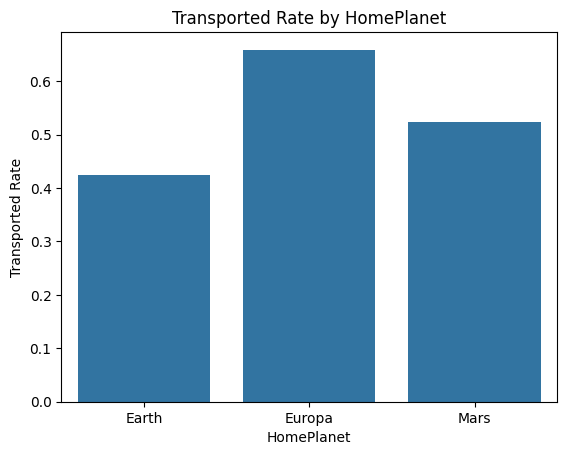

In [27]:
sns.barplot(x=survival_by_planet.index, y=survival_by_planet.values)
plt.ylabel("Transported Rate")
plt.title("Transported Rate by HomePlanet")
plt.show()

### Missingness

In [30]:
missing_counts = data.HomePlanet.isna().sum()
print(missing_counts)

201


In [32]:
data['HomePlanet_missing'] = data['HomePlanet'].isna()
missing_survival = data.groupby('HomePlanet_missing')['Transported'].mean().round(3)
missing_survival

HomePlanet_missing
False    0.503
True     0.512
Name: Transported, dtype: float64

## Cryo Sleep

EDA Ideas:
- Bar plot of True/False proportions.
- Survival rate by CryoSleep (groupby).
- Check if missing values have a pattern: maybe missing is mostly for high spenders?

## Cabin

EDA Ideas:
- Extract Deck, CabinNum, Side first.
- Count plot for Deck and Side.
- Scatter/box plot of CabinNum vs spending (RoomService, FoodCourt).
- Survival rate by deck/side.

## Destination

EDA Ideas:
- Count plot.
- Check survival rate per destination.
- Check if missing destination is informative.

## Age

EDA Ideas:
- Histogram / KDE to see distribution.
- Box plot to detect outliers.
- Scatter plots: Age vs spending, Age vs CryoSleep.
- Survival rate by age groups (binning into child/adult/senior).

## VIP

EDA Ideas:
- Bar plot of VIP status.
- Survival rate by VIP.
- Check correlation with spending features.

## RoomService, FoodCourt, ShoppingMall

EDA Ideas:
- Histogram / log-scale histogram (spending is often skewed).
- Box plot to detect extreme outliers.
- Correlation matrix with other spendings.
- Check missingness vs survival (maybe missing = 0 spending).